<a href="https://colab.research.google.com/github/omarahmed93/Amit/blob/main/gradution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn
import tensorflow as tf
import cv2
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation,Conv2D,Dense,MaxPool2D,Flatten,Dropout


In [3]:
data=pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv")
data.rename(columns={'0':'label'}, inplace=True)

In [4]:
data

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


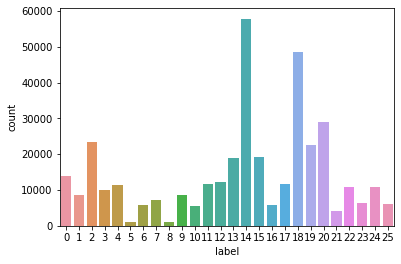

In [5]:
sn.countplot(data.iloc[:,0])

In [6]:
data['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [7]:
ddata=data.iloc[:,1:]

In [8]:
images=[]
for i in range(len(ddata)):
  img=np.array(ddata.iloc[i,:]).reshape(28,28)
  images.append(img)

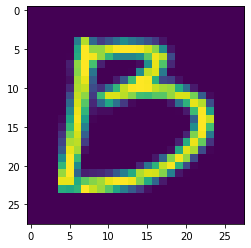

In [9]:
plt.imshow(images[20000])

In [10]:
target=data.iloc[:,0]

In [11]:
target=np.array(target)
target.shape

(372450,)

In [12]:
target=target.reshape(-1,1)
target.shape

(372450, 1)

In [13]:
images=np.array(images)

In [14]:

#Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 

data['label'] = data['label'].map(alphabets_mapper)

In [15]:
data

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trainx,testx,trainy,testy=train_test_split(images,target)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Conv2D,Dense,MaxPool2D,Flatten,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(.1))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1024,activation='relu'))
model.add(Dense(26,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)         0

In [18]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
trainx=trainx/255

In [20]:
trainy.shape

(279337, 1)

In [21]:
history=model.fit(trainx,trainy,epochs=15,steps_per_epoch=30,shuffle=True,validation_split=0.1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 180s 6s/step - loss: 2.1484 - accuracy: 0.4147 - val_loss: 0.9284 - val_accuracy: 0.7275
Epoch 2/15
30/30 [==============================] - 193s 6s/step - loss: 0.6128 - accuracy: 0.8187 - val_loss: 0.3087 - val_accuracy: 0.9110
Epoch 3/15
30/30 [==============================] - 189s 6s/step - loss: 0.2480 - accuracy: 0.9279 - val_loss: 0.1568 - val_accuracy: 0.9570
Epoch 4/15
30/30 [==============================] - 194s 6s/step - loss: 0.1514 - accuracy: 0.9568 - val_loss: 0.1120 - val_accuracy: 0.9690
Epoch 5/15
30/30 [==============================] - 190s 6s/step - loss: 0.1126 - accuracy: 0.9680 - val_loss: 0.0895 - val_accuracy: 0.9748
Epoch 6/15
30/30 [==============================] - 192s 6s/step - loss: 0.0953 - accuracy: 0.9728 - val_loss: 0.0754 - val_accuracy: 0.9792
Epoch 7/15
30/30 [==============================] - 198s 7s/step - loss: 0.0811 - accuracy: 0.9769 - val_loss: 0.0674 - val_accuracy: 0.9805
Epoch 8/15
30/30 [======

In [22]:
trainx=trainx.reshape(279337,28,28,1)

Text(0.5, 0, 'epochs')

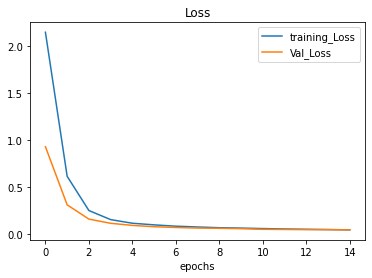

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

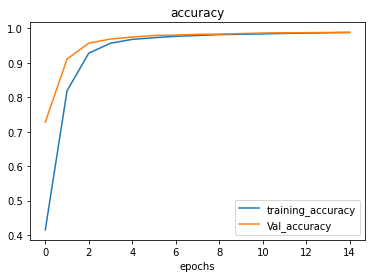

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [25]:
test_loss, test_acc = model.evaluate(trainx,trainy, verbose=2)
print("test accurecy ")
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8730/8730 - 108s - loss: 0.0335 - accuracy: 0.9908 - 108s/epoch - 12ms/step
test accurecy 
0.9908068180084229


In [27]:
y_pred=model.predict(testx)

In [28]:
y_pred[500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

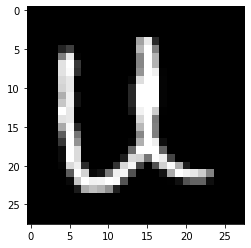

In [32]:
plt.imshow(testx[100],cmap='gray')

In [42]:
model.save('model', save_format= 'h5')